# Customer Attrition


##### Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

# Data Overview

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [240]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [241]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [242]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


## Data Cleaning

In [243]:
df['TotalCharges'].isna().sum()

0

In [244]:
df.loc[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [245]:
#Replacing spaces with null values in total charges column
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)

In [246]:
#Dropping null values from total charges column
todrop = df.loc[df['TotalCharges'].isna()].index
df.drop(todrop, inplace = True)

In [247]:
#Convert to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [248]:
#replace 'No internet service' to No

replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    df[i]  = df[i].replace({'No internet service' : 'No'})

In [249]:
#replace values with binary
# df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [250]:
#Separating churn and non churn customers
churn_df     = df[df["Churn"] == "Yes"]
not_churn_df = df[df["Churn"] == "No"]


In [251]:
#Convert target to binary
df.loc[df['Churn'] == 'Yes', 'Churn'] = 1
df.loc[df['Churn'] == 'No', 'Churn'] = 0

In [252]:
df.loc[df['Churn'] == 'No', 'Churn'] = 0

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [253]:
#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]

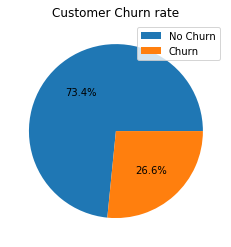

In [254]:
lab = ['No Churn', 'Churn']
val = df['Churn'].value_counts().values.tolist()

fix, ax = plt.subplots()
ax.pie(val, autopct='%1.1f%%')
plt.legend(labels = lab)
plt.title('Customer Churn rate')
plt.show()

ValueError: could not convert string to float: 'Female'

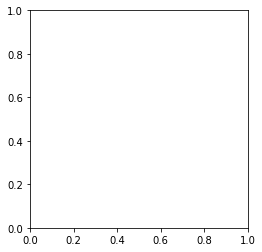

In [260]:
plt.pie(df['gender'])

ValueError: could not convert string to float: 'Male'

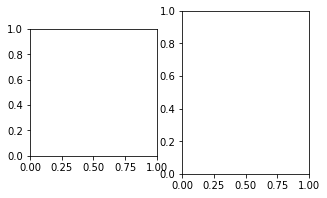

In [259]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].pie(churn_df['gender'])
axes[1].pie(not_churn_df['gender'])
fig.tight_layout()

In [182]:
def plot_pie(column):
    lab1 = churn_df[column].value_counts().keys().tolist()
    val1 = churn_df[column].value_counts().values.tolist()
    
    fix, ax = plt.subplots(1, 2)
    ax.pie(val, autopct='%1.1f%%')
    plt.legend(labels = lab)
    plt.title(str(column + ' churn distribution'))
    plt.show()

    

In [228]:
def plot_histogram(column):
    x = churn_df[column]
    y = not_churn_df[column]
    
    plt.hist([x, y], label = ['churn', 'not churn'], density = True)
    plt.legend()
    
    plt.title(str(column + ' churn distribution'))
    
    plt.xlabel(column)
    plt.ylabel('proportion')
    
    plt.show()
    

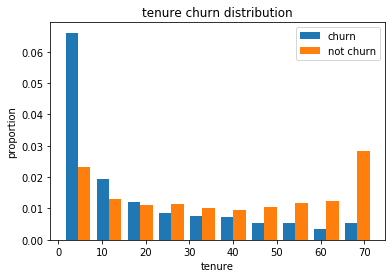

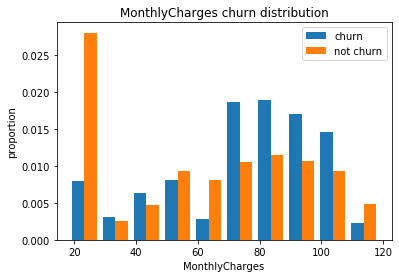

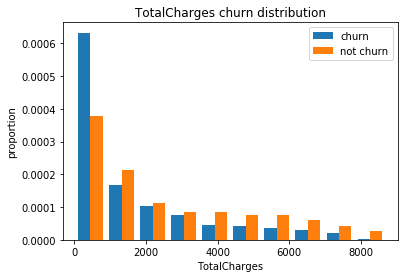

In [229]:
for i in num_cols:
    plot_histogram(i)